In [1]:
from src.helpers import setup_env
import warnings
# Ignore all warnings
warnings.simplefilter('ignore')
setup_env()

GPU available

Processing 22135 files...


Processing files: 100%|██████████| 22135/22135 [00:00<00:00, 268194.58it/s]


Processing EYASE...

Processing ShEMO...

Processing CREMA-D...

Processing RAVDESS...
/home/naif/projects/videoEmotionRecognition/data/preprocessed_faces/audio/02-01-05-01-02-02-04.wav
/home/naif/projects/videoEmotionRecognition/data/preprocessed_faces/audio/02-01-08-01-01-02-10.wav
/home/naif/projects/videoEmotionRecognition/data/preprocessed_faces/audio/02-01-01-01-01-01-06.wav
/home/naif/projects/videoEmotionRecognition/data/preprocessed_faces/audio/02-01-04-01-01-01-19.wav
/home/naif/projects/videoEmotionRecognition/data/preprocessed_faces/audio/02-01-03-02-02-01-11.wav
/home/naif/projects/videoEmotionRecognition/data/preprocessed_faces/audio/02-01-07-02-02-01-21.wav
/home/naif/projects/videoEmotionRecognition/data/preprocessed_faces/audio/02-01-06-02-01-01-17.wav
/home/naif/projects/videoEmotionRecognition/data/preprocessed_faces/audio/02-01-02-02-02-02-13.wav
/home/naif/projects/videoEmotionRecognition/data/preprocessed_faces/audio/02-01-05-01-01-01-11.wav
/home/naif/projects/v

In [1]:
import pandas as pd
import numpy as np
from src.helpers import train_test_split, seed
df =pd.read_csv('data/metadata.csv')
print(df.columns)
df['Emotion'].value_counts()

Index(['Dataset', 'Path', 'Emotion'], dtype='object')


Emotion
neutral     4099
angry       3978
sad         3253
happy       2984
fear        2309
disgust     2271
surprise    1225
Name: count, dtype: int64

In [2]:
df['Emotion'].unique()

array(['happy', 'angry', 'neutral', 'sad', 'surprise', 'fear', 'disgust'],
      dtype=object)

In [3]:
df =df[~((df['Emotion']=='surprise') | (df['Emotion']=='disgust')| (df['Emotion']=='fear') |  (df['Dataset']=='RAVDESS')|(df['Dataset']=='EYASE')| (df['Dataset']=='SaudiEMO') )].reset_index(drop=True) #|(df['Dataset']=='SaudiEMO')| (df['Dataset']=='RAVDESS')| (df['Dataset']=='EYASE') | (df['Dataset']=='CREMA-D') | (df['Dataset']=='ShEMO')| (df['Dataset']=='CREMA-D')
# df =df[df['Dataset']=='UJ_ARABIC' ] #| ((df['Dataset']=='SaudiEMO') & (df['Emotion']=='sad')) |(df['Emotion']=='neutral') (df['Dataset']=='EYASE') | ((df['Dataset']=='SaudiEMO')&((df['Emotion']!='happy')))|
counts=df['Emotion'].value_counts()
counts

Emotion
angry      3499
neutral    3252
sad        2858
happy      2603
Name: count, dtype: int64

In [4]:
df['stratify_on'] = df['Dataset']+'_'+df['Emotion']
df['stratify_on'].value_counts()

stratify_on
CREMA-D_angry        1271
CREMA-D_sad          1271
CREMA-D_happy        1271
CREMA-D_neutral      1087
ShEMO_angry          1059
ShEMO_neutral        1028
SUBESCO_neutral      1000
SUBESCO_sad          1000
SUBESCO_happy        1000
SUBESCO_angry        1000
ShEMO_sad             449
ShEMO_happy           201
URDU_happy            100
URDU_angry            100
URDU_neutral          100
URDU_sad              100
UJ_ARABIC_angry        69
UJ_ARABIC_sad          38
UJ_ARABIC_neutral      37
UJ_ARABIC_happy        31
Name: count, dtype: int64

In [5]:
VALID_SIZE=0.2
df['Emotion'] = df['Emotion'].astype("category")
df['target']=df['Emotion'].cat.codes.astype(np.int64)
# Perform the stratified split
train_df, valid_df = train_test_split(df, stratify=df['stratify_on'], test_size=VALID_SIZE, random_state=seed)
# [path, class, target_code]
 

In [6]:
# Get unique classes and their counts
stratify_on =train_df['stratify_on'].to_numpy()
unique_classes, class_counts = np.unique(stratify_on, return_counts=True)

# Calculate class weights (inverse frequency)
n_samples = len(stratify_on)
class_weights = {}
for cls, count in zip(unique_classes, class_counts):
    # Weight = total_samples / (num_classes * count_per_class)
    if cls =="SaudiEMO_neutral":
        class_weights[cls] = n_samples / (len(unique_classes) * (count+300))**0.7
    else:
        class_weights[cls] = n_samples / (len(unique_classes) * count)**0.9

class_weights = {key :class_weights[key]/sum(class_weights.values()) for key  in class_weights}
# Create sample weights array
sample_weights = [class_weights[t] for t in stratify_on]
sample_weights[:10]

[0.007990741631059764,
 0.017277110263772006,
 0.007990741631059764,
 0.008208872380719663,
 0.017277110263772006,
 0.035645118859703284,
 0.017277110263772006,
 0.017277110263772006,
 0.007990741631059764,
 0.035645118859703284]

In [7]:
class_weights

{'CREMA-D_angry': 0.006785072585369801,
 'CREMA-D_happy': 0.006785072585369801,
 'CREMA-D_neutral': 0.007808651276794735,
 'CREMA-D_sad': 0.006785072585369801,
 'SUBESCO_angry': 0.008420974792967988,
 'SUBESCO_happy': 0.008420974792967988,
 'SUBESCO_neutral': 0.008420974792967988,
 'SUBESCO_sad': 0.008420974792967988,
 'ShEMO_angry': 0.007990741631059764,
 'ShEMO_happy': 0.035645118859703284,
 'ShEMO_neutral': 0.008208872380719663,
 'ShEMO_sad': 0.017277110263772006,
 'UJ_ARABIC_angry': 0.09220917392917168,
 'UJ_ARABIC_happy': 0.19054490816987674,
 'UJ_ARABIC_neutral': 0.16170901300682874,
 'UJ_ARABIC_sad': 0.1570065718758547,
 'URDU_angry': 0.06689018041955934,
 'URDU_happy': 0.06689018041955934,
 'URDU_neutral': 0.06689018041955934,
 'URDU_sad': 0.06689018041955934}

In [8]:
df['Emotion'].cat.categories

Index(['angry', 'happy', 'neutral', 'sad'], dtype='object')

In [9]:
train_df['target']

0       0
1       3
2       0
3       2
4       3
       ..
9770    1
9771    3
9772    1
9773    1
9774    2
Name: target, Length: 9775, dtype: int64

In [10]:
len(df)/counts

Emotion
angry      3.490140
neutral    3.755228
sad        4.272918
happy      4.691510
Name: count, dtype: float64

In [11]:
class_counts = df['Emotion'].cat.codes.value_counts()
class_counts

0    3499
2    3252
3    2858
1    2603
Name: count, dtype: int64

In [12]:
df['Emotion'].cat.categories

Index(['angry', 'happy', 'neutral', 'sad'], dtype='object')

### from scratch trainnig

In [13]:
# imports
from src.data import audio_data_loader
from src.train import optimize
from src.helpers import load_model, replace_insatance
import torch.nn.functional as F
import src.model as models
from torch.optim import lr_scheduler
import torch

2024-11-30 05:30:33.136819: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-30 05:30:33.605108: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [14]:
class_weights= torch.tensor([len(df)/(class_counts[i]*len(class_counts))**0.5 for i in range(len(class_counts)) ],dtype=torch.float32 ,device='cuda')
class_weights/=class_weights.sum()
class_weights

tensor([0.2324, 0.2694, 0.2411, 0.2571], device='cuda:0')

In [ ]:
# trainnig parameters
print_model=1
batch_size = 16 # size of the minibatch for stochastic gradient descent (or Adam)
num_epochs = 16     # number of epochs for training
num_classes = len(counts)       # number of classes. Do not change this
learning_rate =0.001*(0.4)**0  # Learning rate for SGD (or Adam)
weight_decay = 0.004     # regularization. Increase this to combat overfitting
momentum=0.9 
accumulation_steps=4
checkpoints_loading_order = ['best', 'last']
# features_to_use=['emotion2vec'] #  bert, emotion2vec
model_name= "FullEm2vecGRU384h"
suffix='0.6Oversampling0.5'

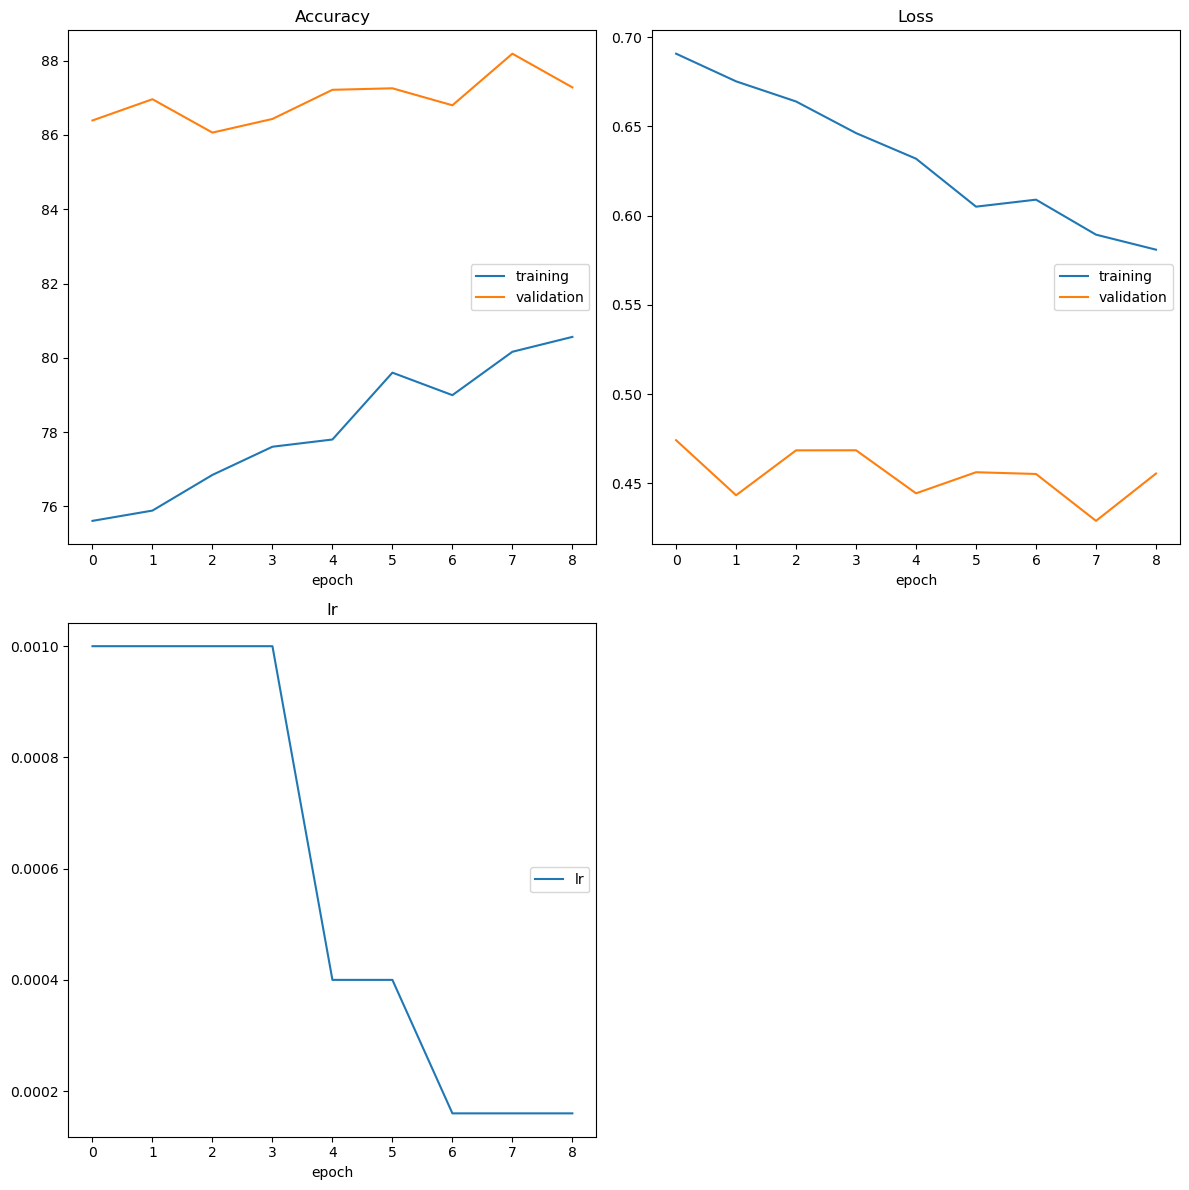

Epoch: 25 	Training Loss: 0.580900 	Validation Loss: 0.455464	Training Acc@1: 80.563 	Validation Acc@1: 87.279


Training:   5%|█▌                              | 30/611 [00:09<03:13,  3.00it/s]


KeyboardInterrupt: 

In [16]:


sampler = torch.utils.data.WeightedRandomSampler(sample_weights, len(train_df), replacement=True, generator=None)
data_loaders= {'train': audio_data_loader(train_df, sampler=sampler, batch_size=batch_size, num_workers=10),
                'valid': audio_data_loader(valid_df,shuffle=False,batch_size=batch_size, num_workers=10)}
torch.backends.cuda.matmul.allow_tf32=True
torch.backends.cudnn.allow_tf32=True

model = getattr(models, model_name)(num_classes=num_classes)
# # initialize
# def init_weights(m):
#     if isinstance(m, torch.nn.Conv2d):
#         torch.nn.init.orthogonal_(m.weight)

# model.apply(init_weights)
# Get the optimizer using get_optimizer and the model you just created, the learning rate,
# the optimizer and the weight decay specified in the previous cel
optimizer = torch.optim.AdamW(model.parameters(),lr=learning_rate,weight_decay=weight_decay,) #momentum=momentum,


scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.4, patience=1,threshold=1e-3,verbose=True)
#scheduler = lr_scheduler.ExponentialLR(optimizer,gamma=0.7)


def step(loss ,epoch=None):
    scheduler.step(loss)

def loss(output,target):
    #target=F.one_hot(target, num_classes).float()
    #output=torch.squeeze(output, 1)
    return F.cross_entropy(output, target,label_smoothing=0.03, weight=class_weights) #weight=class_weights




s_epoch=load_model(model_name+suffix,model, loading_order=checkpoints_loading_order)
if print_model:
    print(f"model {model_name} has :{sum(p.numel() for p in model.parameters())/1e6} M parameters ")
    print(f"Effictive W>0.01 precentage: ")
    print('\n'.join('layer {} has : {}'.format(n,torch.sum(torch.abs(p)>0.01)/p.numel()) for n, p in model.named_parameters()))
#replace_insatance(model,torch.nn.LeakyReLU, models.Swish())
#print(model)

optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    s_epoch=s_epoch,
    n_epochs=num_epochs,
    model_name=model_name+suffix,
    step=step,
    accumulation_steps=accumulation_steps,
    run_logs=True,
    interactive_tracking=True 
)

In [22]:
from src.train import valid_one_epoch
model = getattr(models, model_name)(num_classes=num_classes).cuda()

loss =lambda output,target: F.cross_entropy(output, target,label_smoothing=0.03, weight=class_weights)

load_model(model_name+suffix,model,loading_order=checkpoints_loading_order[::1])#checkpoints_loading_order[::-1]
results =[]
for dataset in valid_df['stratify_on'].unique():
    data_df = valid_df[valid_df['stratify_on']==dataset].reset_index(drop=True)
    valid_loader = audio_data_loader(data_df,batch_size=1 ,shuffle=False)
    results.append([dataset, *valid_one_epoch(valid_loader, model, loss)])
results

2024-11-30 06:06:25,966 - modelscope - WARNING - Using branch: master as version is unstable, use with caution


ckpt: /home/naif/.cache/modelscope/hub/iic/emotion2vec_plus_base/model.pt


/home/naif/miniconda3/envs/em2vec/lib/python3.8/site-packages/funasr/train_utils/load_pretrained_model.py:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  src_state = torch

init param, map: modality_encoders.AUDIO.extra_tokens from d2v_model.modality_encoders.AUDIO.extra_tokens in ckpt
init param, map: modality_encoders.AUDIO.alibi_scale from d2v_model.modality_encoders.AUDIO.alibi_scale in ckpt
init param, map: modality_encoders.AUDIO.local_encoder.conv_layers.0.0.weight from d2v_model.modality_encoders.AUDIO.local_encoder.conv_layers.0.0.weight in ckpt
init param, map: modality_encoders.AUDIO.local_encoder.conv_layers.0.2.1.weight from d2v_model.modality_encoders.AUDIO.local_encoder.conv_layers.0.2.1.weight in ckpt
init param, map: modality_encoders.AUDIO.local_encoder.conv_layers.0.2.1.bias from d2v_model.modality_encoders.AUDIO.local_encoder.conv_layers.0.2.1.bias in ckpt
init param, map: modality_encoders.AUDIO.local_encoder.conv_layers.1.0.weight from d2v_model.modality_encoders.AUDIO.local_encoder.conv_layers.1.0.weight in ckpt
init param, map: modality_encoders.AUDIO.local_encoder.conv_layers.1.2.1.weight from d2v_model.modality_encoders.AUDIO.loc

/home/naif/projects/emotion2vec/src/helpers.py:496: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(f'{checkpoints_dir}/{loading_order[0]}_{model_name}

[['CREMA-D_angry', 0.2329760121665602, [96.06299212598425]],
 ['CREMA-D_happy', 0.3576825704044245, [94.48818897637796]],
 ['CREMA-D_neutral', 0.24608859234416533, [96.7741935483871]],
 ['CREMA-D_sad', 0.8230303724215728, [73.22834645669292]],
 ['SUBESCO_angry', 0.2531627096980807, [95.5]],
 ['SUBESCO_happy', 0.40642914988100526, [91.0]],
 ['SUBESCO_neutral', 0.23625634364783765, [95.0]],
 ['SUBESCO_sad', 1.0397629117965703, [66.5]],
 ['ShEMO_angry', 0.2214658980685952, [97.6303317535545]],
 ['ShEMO_happy', 0.3336712401360273, [92.5]],
 ['ShEMO_neutral', 0.28503327456916244, [95.1219512195122]],
 ['ShEMO_sad', 1.3410219494881257, [64.04494382022472]],
 ['UJ_ARABIC_angry', 0.5018020169093058, [92.3076923076923]],
 ['UJ_ARABIC_happy', 0.7374432807167371, [83.33333333333333]],
 ['UJ_ARABIC_neutral', 0.7109463278736388, [71.42857142857143]],
 ['UJ_ARABIC_sad', 2.3586066748414725, [28.571428571428573]],
 ['URDU_angry', 0.14639066830277442, [100.0]],
 ['URDU_happy', 0.44802838712930676, [85.

In [23]:
data_df = valid_df[valid_df['Dataset']=='UJ_ARABIC'].reset_index(drop=True)
valid_loader = audio_data_loader(data_df,batch_size=1 ,shuffle=False)
valid_one_epoch(valid_loader, model, loss)

Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|███████████████████████████████| 33/33 [00:01<00:00, 31.77it/s]


(0.9828774825190053, [72.72727272727273])

In [ ]:
from src.train import valid_one_epoch
import pandas as pd
import numpy as np
import torch
import src.model as models
from src.helpers import train_test_split, seed, load_model
from src.data import audio_data_loader
import torch.nn.functional as F

df =pd.read_csv('data/metadata.csv')
checkpoints_loading_order = ['best', 'last']
results =[]
df =df[~((df['Emotion']=='surprise') | (df['Emotion']=='disgust')| (df['Emotion']=='fear') |  (df['Dataset']=='RAVDESS')|(df['Dataset']=='EYASE')| (df['Dataset']=='SaudiEMO') )].reset_index(drop=True) #|(df['Dataset']=='SaudiEMO')| (df['Dataset']=='RAVDESS')| (df['Dataset']=='EYASE') | (df['Dataset']=='CREMA-D') | (df['Dataset']=='ShEMO')| (df['Dataset']=='CREMA-D')
# df =df[df['Dataset']=='UJ_ARABIC' ] #| ((df['Dataset']=='SaudiEMO') & (df['Emotion']=='sad')) |(df['Emotion']=='neutral') (df['Dataset']=='EYASE') | ((df['Dataset']=='SaudiEMO')&((df['Emotion']!='happy')))|
counts=df['Emotion'].value_counts()
df['stratify_on'] = df['Dataset']+'_'+df['Emotion']
df['Emotion'] = df['Emotion'].astype("category")
df['target']=df['Emotion'].cat.codes.astype(np.int64)

model = getattr(models, "FullEm2vecGRU384h")(num_classes=len(counts)).cuda()

loss =lambda output,target: F.cross_entropy(output, target,label_smoothing=0.03)
for fold in range(5):
    current_seed = seed + fold
    
    torch.manual_seed(current_seed)
    np.random.seed(current_seed)
    

    train_fold, valid_fold = train_test_split(
        df, 
        test_size=0.2,
        stratify=df['stratify_on'],
        random_state=current_seed
    )

    model_name = f"phase1_fold{fold}"
    load_model(model_name,model,loading_order=checkpoints_loading_order, checkpoints_dir="experiments/20241130_064549_two_phase_training/model_checkpoints")#checkpoints_loading_order[::-1]
    # phase1
    for dataset in valid_fold['stratify_on'].unique():
        data_df = valid_fold[valid_fold['stratify_on']==dataset].reset_index(drop=True)
        valid_loader = audio_data_loader(data_df,batch_size=1 ,shuffle=False)
        results.append(["phase1","best",fold,dataset, *valid_one_epoch(valid_loader, model, loss)])

    model_name = f"phase2_fold{fold}"
    load_model(model_name,model,loading_order=checkpoints_loading_order, checkpoints_dir="experiments/20241130_064549_two_phase_training/model_checkpoints")#checkpoints_loading_order[::-1]
    # phase1
    for dataset in valid_fold['stratify_on'].unique():
        data_df = valid_fold[valid_fold['stratify_on']==dataset].reset_index(drop=True)
        valid_loader = audio_data_loader(data_df,batch_size=1 ,shuffle=False)
        results.append(["phase2","best",fold,dataset, *valid_one_epoch(valid_loader, model, loss)])

    model_name = f"phase1_fold{fold}"
    load_model(model_name,model,loading_order=checkpoints_loading_order[::-1], checkpoints_dir="experiments/20241130_064549_two_phase_training/model_checkpoints")#checkpoints_loading_order[::-1]
    # phase1
    for dataset in valid_fold['stratify_on'].unique():
        data_df = valid_fold[valid_fold['stratify_on']==dataset].reset_index(drop=True)
        valid_loader = audio_data_loader(data_df,batch_size=1 ,shuffle=False)
        results.append(["phase1","last",fold,dataset, *valid_one_epoch(valid_loader, model, loss)])

    model_name = f"phase2_fold{fold}"
    load_model(model_name,model,loading_order=checkpoints_loading_order[::-1], checkpoints_dir="experiments/20241130_064549_two_phase_training/model_checkpoints")#checkpoints_loading_order[::-1]
    # phase1
    for dataset in valid_fold['stratify_on'].unique():
        data_df = valid_fold[valid_fold['stratify_on']==dataset].reset_index(drop=True)
        valid_loader = audio_data_loader(data_df,batch_size=1 ,shuffle=False)
        results.append(["phase2","last",fold,dataset, *valid_one_epoch(valid_loader, model, loss)])

results

2024-11-30 17:19:20.100300: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-30 17:19:20.545791: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/naif/miniconda3/envs/em2vec/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-11-30 17:19:24,624 - modelscope - WARNING - Using branch: master as version is unstable, use with caution


ckpt: /home/naif/.cache/modelscope/hub/iic/emotion2vec_plus_base/model.pt


/home/naif/miniconda3/envs/em2vec/lib/python3.8/site-packages/funasr/train_utils/load_pretrained_model.py:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  src_state = torch

init param, map: modality_encoders.AUDIO.extra_tokens from d2v_model.modality_encoders.AUDIO.extra_tokens in ckpt
init param, map: modality_encoders.AUDIO.alibi_scale from d2v_model.modality_encoders.AUDIO.alibi_scale in ckpt
init param, map: modality_encoders.AUDIO.local_encoder.conv_layers.0.0.weight from d2v_model.modality_encoders.AUDIO.local_encoder.conv_layers.0.0.weight in ckpt
init param, map: modality_encoders.AUDIO.local_encoder.conv_layers.0.2.1.weight from d2v_model.modality_encoders.AUDIO.local_encoder.conv_layers.0.2.1.weight in ckpt
init param, map: modality_encoders.AUDIO.local_encoder.conv_layers.0.2.1.bias from d2v_model.modality_encoders.AUDIO.local_encoder.conv_layers.0.2.1.bias in ckpt
init param, map: modality_encoders.AUDIO.local_encoder.conv_layers.1.0.weight from d2v_model.modality_encoders.AUDIO.local_encoder.conv_layers.1.0.weight in ckpt
init param, map: modality_encoders.AUDIO.local_encoder.conv_layers.1.2.1.weight from d2v_model.modality_encoders.AUDIO.loc

/home/naif/projects/emotion2vec/src/helpers.py:496: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(f'{checkpoints_dir}/{loading_order[0]}_{model_name}

Previously trained model weights state_dict loaded...
Previously trained for 25 number of epochs...


Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 66.14it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 74.45it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 217/217 [00:02<00:00, 72.51it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 69.54it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 60.90it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 62.59it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_

Previously trained model weights state_dict loaded...
Previously trained for 8 number of epochs...


Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 68.60it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 72.18it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 217/217 [00:03<00:00, 68.41it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 67.53it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 60.67it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 60.30it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_

Previously trained model weights state_dict loaded...
Previously trained for 25 number of epochs...


Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 66.24it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 69.07it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 217/217 [00:03<00:00, 66.35it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 67.23it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 59.98it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 59.71it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_

Previously trained model weights state_dict loaded...
Previously trained for 10 number of epochs...


Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:04<00:00, 62.08it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 65.98it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 217/217 [00:03<00:00, 67.62it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 65.89it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 59.47it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 54.57it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_

[['phase1', 'best', 0, 'CREMA-D_angry', 0.23132538425875457, [95.2755905511811]], ['phase1', 'best', 0, 'CREMA-D_happy', 0.30659085259897517, [93.7007874015748]], ['phase1', 'best', 0, 'CREMA-D_neutral', 0.2624118492213261, [96.7741935483871]], ['phase1', 'best', 0, 'CREMA-D_sad', 0.6884657806885521, [76.77165354330708]], ['phase1', 'best', 0, 'SUBESCO_angry', 0.23836650431156167, [95.5]], ['phase1', 'best', 0, 'SUBESCO_happy', 0.3772680326551199, [92.0]], ['phase1', 'best', 0, 'SUBESCO_neutral', 0.24521834380924715, [95.0]], ['phase1', 'best', 0, 'SUBESCO_sad', 0.9525371509045363, [67.5]], ['phase1', 'best', 0, 'ShEMO_angry', 0.21216610582518927, [97.6303317535545]], ['phase1', 'best', 0, 'ShEMO_happy', 0.3126272886991502, [92.5]], ['phase1', 'best', 0, 'ShEMO_neutral', 0.27502004424246357, [95.60975609756098]], ['phase1', 'best', 0, 'ShEMO_sad', 1.2037365490131162, [66.29213483146067]], ['phase1', 'best', 0, 'UJ_ARABIC_angry', 0.6361714372268089, [69.23076923076923]], ['phase1', 'bes

Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 67.71it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 68.12it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 217/217 [00:03<00:00, 65.74it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 67.03it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 56.07it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 59.30it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_

Previously trained model weights state_dict loaded...
Previously trained for 7 number of epochs...


Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:04<00:00, 63.04it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 63.53it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 217/217 [00:03<00:00, 65.44it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 65.48it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 58.34it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 58.75it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_

Previously trained model weights state_dict loaded...
Previously trained for 25 number of epochs...


Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 66.60it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 67.21it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 217/217 [00:03<00:00, 67.17it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 67.02it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 56.51it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 55.01it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_

Previously trained model weights state_dict loaded...
Previously trained for 10 number of epochs...


Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 63.96it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 65.37it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 217/217 [00:03<00:00, 64.83it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 64.09it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 57.87it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 56.53it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_

[['phase1', 'best', 0, 'CREMA-D_angry', 0.23132538425875457, [95.2755905511811]], ['phase1', 'best', 0, 'CREMA-D_happy', 0.30659085259897517, [93.7007874015748]], ['phase1', 'best', 0, 'CREMA-D_neutral', 0.2624118492213261, [96.7741935483871]], ['phase1', 'best', 0, 'CREMA-D_sad', 0.6884657806885521, [76.77165354330708]], ['phase1', 'best', 0, 'SUBESCO_angry', 0.23836650431156167, [95.5]], ['phase1', 'best', 0, 'SUBESCO_happy', 0.3772680326551199, [92.0]], ['phase1', 'best', 0, 'SUBESCO_neutral', 0.24521834380924715, [95.0]], ['phase1', 'best', 0, 'SUBESCO_sad', 0.9525371509045363, [67.5]], ['phase1', 'best', 0, 'ShEMO_angry', 0.21216610582518927, [97.6303317535545]], ['phase1', 'best', 0, 'ShEMO_happy', 0.3126272886991502, [92.5]], ['phase1', 'best', 0, 'ShEMO_neutral', 0.27502004424246357, [95.60975609756098]], ['phase1', 'best', 0, 'ShEMO_sad', 1.2037365490131162, [66.29213483146067]], ['phase1', 'best', 0, 'UJ_ARABIC_angry', 0.6361714372268089, [69.23076923076923]], ['phase1', 'bes

Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 65.81it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 65.56it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 217/217 [00:03<00:00, 62.42it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 66.28it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 56.22it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 56.37it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_

Previously trained model weights state_dict loaded...
Previously trained for 1 number of epochs...


Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 63.80it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:04<00:00, 63.42it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 217/217 [00:03<00:00, 63.70it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 64.63it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 55.61it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 56.04it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_

Previously trained model weights state_dict loaded...
Previously trained for 25 number of epochs...


Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 65.62it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 65.46it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 217/217 [00:03<00:00, 62.81it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:04<00:00, 62.88it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 56.33it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 56.73it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_

Previously trained model weights state_dict loaded...
Previously trained for 10 number of epochs...


Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 66.86it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 65.76it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 217/217 [00:03<00:00, 64.94it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 65.83it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 56.80it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 56.42it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_

[['phase1', 'best', 0, 'CREMA-D_angry', 0.23132538425875457, [95.2755905511811]], ['phase1', 'best', 0, 'CREMA-D_happy', 0.30659085259897517, [93.7007874015748]], ['phase1', 'best', 0, 'CREMA-D_neutral', 0.2624118492213261, [96.7741935483871]], ['phase1', 'best', 0, 'CREMA-D_sad', 0.6884657806885521, [76.77165354330708]], ['phase1', 'best', 0, 'SUBESCO_angry', 0.23836650431156167, [95.5]], ['phase1', 'best', 0, 'SUBESCO_happy', 0.3772680326551199, [92.0]], ['phase1', 'best', 0, 'SUBESCO_neutral', 0.24521834380924715, [95.0]], ['phase1', 'best', 0, 'SUBESCO_sad', 0.9525371509045363, [67.5]], ['phase1', 'best', 0, 'ShEMO_angry', 0.21216610582518927, [97.6303317535545]], ['phase1', 'best', 0, 'ShEMO_happy', 0.3126272886991502, [92.5]], ['phase1', 'best', 0, 'ShEMO_neutral', 0.27502004424246357, [95.60975609756098]], ['phase1', 'best', 0, 'ShEMO_sad', 1.2037365490131162, [66.29213483146067]], ['phase1', 'best', 0, 'UJ_ARABIC_angry', 0.6361714372268089, [69.23076923076923]], ['phase1', 'bes

Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 65.18it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 66.51it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 217/217 [00:03<00:00, 64.75it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 65.00it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 56.45it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 56.30it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_

Previously trained model weights state_dict loaded...
Previously trained for 3 number of epochs...


Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 66.99it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 67.64it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 217/217 [00:03<00:00, 65.20it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 66.27it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 56.85it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 57.77it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_

Previously trained model weights state_dict loaded...
Previously trained for 25 number of epochs...


Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 65.04it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 64.95it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 217/217 [00:03<00:00, 65.66it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 64.93it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 58.29it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 57.37it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_

Previously trained model weights state_dict loaded...
Previously trained for 10 number of epochs...


Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 65.96it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 66.14it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 217/217 [00:03<00:00, 65.49it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 65.28it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 57.69it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 57.35it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_

[['phase1', 'best', 0, 'CREMA-D_angry', 0.23132538425875457, [95.2755905511811]], ['phase1', 'best', 0, 'CREMA-D_happy', 0.30659085259897517, [93.7007874015748]], ['phase1', 'best', 0, 'CREMA-D_neutral', 0.2624118492213261, [96.7741935483871]], ['phase1', 'best', 0, 'CREMA-D_sad', 0.6884657806885521, [76.77165354330708]], ['phase1', 'best', 0, 'SUBESCO_angry', 0.23836650431156167, [95.5]], ['phase1', 'best', 0, 'SUBESCO_happy', 0.3772680326551199, [92.0]], ['phase1', 'best', 0, 'SUBESCO_neutral', 0.24521834380924715, [95.0]], ['phase1', 'best', 0, 'SUBESCO_sad', 0.9525371509045363, [67.5]], ['phase1', 'best', 0, 'ShEMO_angry', 0.21216610582518927, [97.6303317535545]], ['phase1', 'best', 0, 'ShEMO_happy', 0.3126272886991502, [92.5]], ['phase1', 'best', 0, 'ShEMO_neutral', 0.27502004424246357, [95.60975609756098]], ['phase1', 'best', 0, 'ShEMO_sad', 1.2037365490131162, [66.29213483146067]], ['phase1', 'best', 0, 'UJ_ARABIC_angry', 0.6361714372268089, [69.23076923076923]], ['phase1', 'bes

Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 64.94it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 65.33it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 217/217 [00:03<00:00, 65.60it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 64.55it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 55.05it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 56.89it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_

Previously trained model weights state_dict loaded...
Previously trained for 4 number of epochs...


Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 65.48it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 67.28it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 217/217 [00:03<00:00, 65.30it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 63.92it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 53.83it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 55.90it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_

Previously trained model weights state_dict loaded...
Previously trained for 25 number of epochs...


Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 63.69it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:04<00:00, 63.20it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 217/217 [00:03<00:00, 60.19it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:04<00:00, 60.15it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 52.10it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 51.53it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_

Previously trained model weights state_dict loaded...
Previously trained for 10 number of epochs...


Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 64.74it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:03<00:00, 66.03it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 217/217 [00:03<00:00, 62.33it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 254/254 [00:04<00:00, 62.34it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 56.05it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_silero-vad_master
Validating: 100%|█████████████████████████████| 200/200 [00:03<00:00, 54.24it/s]
Using cache found in /home/naif/.cache/torch/hub/snakers4_

[['phase1', 'best', 0, 'CREMA-D_angry', 0.23132538425875457, [95.2755905511811]], ['phase1', 'best', 0, 'CREMA-D_happy', 0.30659085259897517, [93.7007874015748]], ['phase1', 'best', 0, 'CREMA-D_neutral', 0.2624118492213261, [96.7741935483871]], ['phase1', 'best', 0, 'CREMA-D_sad', 0.6884657806885521, [76.77165354330708]], ['phase1', 'best', 0, 'SUBESCO_angry', 0.23836650431156167, [95.5]], ['phase1', 'best', 0, 'SUBESCO_happy', 0.3772680326551199, [92.0]], ['phase1', 'best', 0, 'SUBESCO_neutral', 0.24521834380924715, [95.0]], ['phase1', 'best', 0, 'SUBESCO_sad', 0.9525371509045363, [67.5]], ['phase1', 'best', 0, 'ShEMO_angry', 0.21216610582518927, [97.6303317535545]], ['phase1', 'best', 0, 'ShEMO_happy', 0.3126272886991502, [92.5]], ['phase1', 'best', 0, 'ShEMO_neutral', 0.27502004424246357, [95.60975609756098]], ['phase1', 'best', 0, 'ShEMO_sad', 1.2037365490131162, [66.29213483146067]], ['phase1', 'best', 0, 'UJ_ARABIC_angry', 0.6361714372268089, [69.23076923076923]], ['phase1', 'bes

[['phase1',
  'best',
  0,
  'CREMA-D_angry',
  0.23132538425875457,
  [95.2755905511811]],
 ['phase1',
  'best',
  0,
  'CREMA-D_happy',
  0.30659085259897517,
  [93.7007874015748]],
 ['phase1',
  'best',
  0,
  'CREMA-D_neutral',
  0.2624118492213261,
  [96.7741935483871]],
 ['phase1', 'best', 0, 'CREMA-D_sad', 0.6884657806885521, [76.77165354330708]],
 ['phase1', 'best', 0, 'SUBESCO_angry', 0.23836650431156167, [95.5]],
 ['phase1', 'best', 0, 'SUBESCO_happy', 0.3772680326551199, [92.0]],
 ['phase1', 'best', 0, 'SUBESCO_neutral', 0.24521834380924715, [95.0]],
 ['phase1', 'best', 0, 'SUBESCO_sad', 0.9525371509045363, [67.5]],
 ['phase1', 'best', 0, 'ShEMO_angry', 0.21216610582518927, [97.6303317535545]],
 ['phase1', 'best', 0, 'ShEMO_happy', 0.3126272886991502, [92.5]],
 ['phase1',
  'best',
  0,
  'ShEMO_neutral',
  0.27502004424246357,
  [95.60975609756098]],
 ['phase1', 'best', 0, 'ShEMO_sad', 1.2037365490131162, [66.29213483146067]],
 ['phase1',
  'best',
  0,
  'UJ_ARABIC_angry',

In [2]:
# Create DataFrame with descriptive column names
df = pd.DataFrame(results, columns=['Phase','checkpoint', 'Fold', 'Dataset', 'Loss', 'Accuracy'])

# Optional: print the DataFrame to verify
print(df)

      Phase checkpoint  Fold          Dataset      Loss              Accuracy
0    phase1       best     0    CREMA-D_angry  0.231325    [95.2755905511811]
1    phase1       best     0    CREMA-D_happy  0.306591    [93.7007874015748]
2    phase1       best     0  CREMA-D_neutral  0.262412    [96.7741935483871]
3    phase1       best     0      CREMA-D_sad  0.688466   [76.77165354330708]
4    phase1       best     0    SUBESCO_angry  0.238367                [95.5]
..      ...        ...   ...              ...       ...                   ...
395  phase2       last     4    UJ_ARABIC_sad  2.749868  [14.285714285714286]
396  phase2       last     4       URDU_angry  0.177102               [100.0]
397  phase2       last     4       URDU_happy  0.375868                [90.0]
398  phase2       last     4     URDU_neutral  0.350605                [90.0]
399  phase2       last     4         URDU_sad  0.494261                [90.0]

[400 rows x 6 columns]


In [3]:
df.to_csv("meta.csv", index=False)

In [24]:
torch.save(model.rnn,'GRU.pt')

In [ ]:
model.projector =torch.load('proj.pt')

/tmp/ipykernel_1778833/2959341848.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.projector =torch.load('proj.pt')


In [ ]:
from src.train import valid_one_epoch
model = getattr(models, 'FullEm2vecTest')(num_classes=num_classes).cuda()

loss =lambda output,target: F.cross_entropy(output, target)

# load_model(model_name+suffix,model, checkpoints_loading_order[::-1])
results =[]
for dataset in df['stratify_on'].unique():
    data_df = df[df['stratify_on']==dataset]
    valid_loader = audio_data_loader(data_df,batch_size=2 ,shuffle=False)
    results.append([dataset, *valid_one_epoch(valid_loader, model, loss)])

results

2024-11-20 02:53:23,802 - modelscope - WARNING - Using branch: master as version is unstable, use with caution


ckpt: /home/naif/.cache/modelscope/hub/iic/emotion2vec_plus_base/model.pt
init param, map: modality_encoders.AUDIO.extra_tokens from d2v_model.modality_encoders.AUDIO.extra_tokens in ckpt
init param, map: modality_encoders.AUDIO.alibi_scale from d2v_model.modality_encoders.AUDIO.alibi_scale in ckpt
init param, map: modality_encoders.AUDIO.local_encoder.conv_layers.0.0.weight from d2v_model.modality_encoders.AUDIO.local_encoder.conv_layers.0.0.weight in ckpt
init param, map: modality_encoders.AUDIO.local_encoder.conv_layers.0.2.1.weight from d2v_model.modality_encoders.AUDIO.local_encoder.conv_layers.0.2.1.weight in ckpt
init param, map: modality_encoders.AUDIO.local_encoder.conv_layers.0.2.1.bias from d2v_model.modality_encoders.AUDIO.local_encoder.conv_layers.0.2.1.bias in ckpt
init param, map: modality_encoders.AUDIO.local_encoder.conv_layers.1.0.weight from d2v_model.modality_encoders.AUDIO.local_encoder.conv_layers.1.0.weight in ckpt
init param, map: modality_encoders.AUDIO.local_e

Validating: 100%|███████████████████████████████| 84/84 [00:02<00:00, 37.90it/s]


[['ShEMO_angry', 0.6313660236361548, [93.9622641509434]],
 ['ShEMO_sad', 2.635327648201336, [84.22222222222223]],
 ['ShEMO_neutral', 0.9424898337682933, [85.60311284046692]],
 ['ShEMO_happy', 1.3384973176699921, [79.20792079207921]],
 ['CREMA-D_angry', 0.34798652494166926, [94.88993710691824]],
 ['CREMA-D_sad', 0.8742313235636252, [86.55660377358491]],
 ['CREMA-D_happy', 0.6648911659654918, [90.40880503144655]],
 ['CREMA-D_neutral', 0.09881785538015328, [97.88602941176471]],
 ['URDU_neutral', 0.1295671649468027, [97.0]],
 ['URDU_angry', 0.5243660743927862, [92.0]],
 ['URDU_sad', 1.2722682539913879, [90.0]],
 ['URDU_happy', 1.152156426681484, [86.0]],
 ['UJ_ARABIC_angry', 2.4565693540370597, [64.28571428571429]],
 ['UJ_ARABIC_happy', 3.0864874319383926, [56.25]],
 ['UJ_ARABIC_sad', 6.866490197306695, [42.10526315789474]],
 ['UJ_ARABIC_neutral', 1.395467316094856, [81.57894736842105]],
 ['SaudiEMO_sad', 5.440301708282078, [37.5]],
 ['SaudiEMO_neutral', 3.491840683522906, [50.383141762452

In [ ]:
from funasr import AutoModel
from src.helpers import load_audio
exc = AutoModel(model="iic/emotion2vec_plus_base",  device="cuda")
wav_file = f"رياكشن معصب ٢.wav"
res = exc.inference(wav_file, granularity="utterance", extract_embedding=True,disable_pbar=True)


2024-11-12 18:39:29,061 - modelscope - WARNING - Using branch: master as version is unstable, use with caution


ckpt: /home/naif/.cache/modelscope/hub/iic/emotion2vec_plus_base/model.pt


/home/naif/miniconda3/envs/em2vec/lib/python3.8/site-packages/funasr/train_utils/load_pretrained_model.py:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  src_state = torch

init param, map: modality_encoders.AUDIO.extra_tokens from d2v_model.modality_encoders.AUDIO.extra_tokens in ckpt
init param, map: modality_encoders.AUDIO.alibi_scale from d2v_model.modality_encoders.AUDIO.alibi_scale in ckpt
init param, map: modality_encoders.AUDIO.local_encoder.conv_layers.0.0.weight from d2v_model.modality_encoders.AUDIO.local_encoder.conv_layers.0.0.weight in ckpt
init param, map: modality_encoders.AUDIO.local_encoder.conv_layers.0.2.1.weight from d2v_model.modality_encoders.AUDIO.local_encoder.conv_layers.0.2.1.weight in ckpt
init param, map: modality_encoders.AUDIO.local_encoder.conv_layers.0.2.1.bias from d2v_model.modality_encoders.AUDIO.local_encoder.conv_layers.0.2.1.bias in ckpt
init param, map: modality_encoders.AUDIO.local_encoder.conv_layers.1.0.weight from d2v_model.modality_encoders.AUDIO.local_encoder.conv_layers.1.0.weight in ckpt
init param, map: modality_encoders.AUDIO.local_encoder.conv_layers.1.2.1.weight from d2v_model.modality_encoders.AUDIO.loc

In [ ]:
with torch.inference_mode():
    out = model(torch.from_numpy(res[0]['feats']).to('cuda'))


In [ ]:
classes = df['Emotion'].cat.categories

In [ ]:
torch.softmax(out, dim=-1)

tensor([0.0229, 0.0054, 0.9504, 0.0063, 0.0150], device='cuda:0')

In [ ]:
classes

Index(['angry', 'fear', 'happy', 'neutral', 'sad'], dtype='object')

In [ ]:
res[0]

{'key': 'رياكشن معصب ٢',
 'labels': ['生气/angry',
  '厌恶/disgusted',
  '恐惧/fearful',
  '开心/happy',
  '中立/neutral',
  '其他/other',
  '难过/sad',
  '吃惊/surprised',
  '<unk>'],
 'scores': [3.271125592618773e-07,
  4.801344388738471e-08,
  1.5675524878133729e-07,
  0.999998927116394,
  5.552280413212429e-09,
  1.1092309293303515e-08,
  4.856877922065905e-07,
  8.402290774256471e-08,
  1.57839663561532e-09],
 'feats': array([-1.95248723e+00,  5.59582174e-01,  6.73812985e-01, -8.30257162e-02,
        -1.22654605e+00,  1.68417907e+00,  3.78143042e-01, -7.12111831e-01,
        -5.32430172e-01,  9.73603308e-01,  2.87339360e-01, -1.19878554e+00,
         1.48408413e-02,  2.61405969e+00, -3.24683619e+00,  1.22547472e+00,
        -1.14901733e+00,  7.62447834e-01, -9.01012301e-01, -6.68091655e-01,
        -1.25311911e+00, -1.06551325e+00, -7.04200685e-01, -1.19542569e-01,
         6.96588457e-01,  1.51642263e+00, -3.23578501e+00, -2.81354249e-01,
         1.70422697e+00,  2.02054277e-01,  3.04226637e-01

In [ ]:
model = getattr(models, 'FullEm2vecTest')(num_classes=num_classes).cuda()

2024-11-20 04:04:55,483 - modelscope - WARNING - Using branch: master as version is unstable, use with caution


ckpt: /home/naif/.cache/modelscope/hub/iic/emotion2vec_plus_base/model.pt
init param, map: modality_encoders.AUDIO.extra_tokens from d2v_model.modality_encoders.AUDIO.extra_tokens in ckpt
init param, map: modality_encoders.AUDIO.alibi_scale from d2v_model.modality_encoders.AUDIO.alibi_scale in ckpt
init param, map: modality_encoders.AUDIO.local_encoder.conv_layers.0.0.weight from d2v_model.modality_encoders.AUDIO.local_encoder.conv_layers.0.0.weight in ckpt
init param, map: modality_encoders.AUDIO.local_encoder.conv_layers.0.2.1.weight from d2v_model.modality_encoders.AUDIO.local_encoder.conv_layers.0.2.1.weight in ckpt
init param, map: modality_encoders.AUDIO.local_encoder.conv_layers.0.2.1.bias from d2v_model.modality_encoders.AUDIO.local_encoder.conv_layers.0.2.1.bias in ckpt
init param, map: modality_encoders.AUDIO.local_encoder.conv_layers.1.0.weight from d2v_model.modality_encoders.AUDIO.local_encoder.conv_layers.1.0.weight in ckpt
init param, map: modality_encoders.AUDIO.local_e

In [ ]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Optional, List, Union

def create_confusion_matrix(y_true: np.ndarray, y_pred: np.ndarray, num_classes: int) -> np.ndarray:
    """
    Create confusion matrix from true and predicted labels without using sklearn.
    
    Args:
        y_true: Array of true labels
        y_pred: Array of predicted labels
        num_classes: Number of classes
        
    Returns:
        numpy.ndarray: Confusion matrix
    """
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for t, p in zip(y_true, y_pred):
        cm[t, p] += 1
    return cm

def plot_confusion_matrix(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    num_classes: int,
    device: str = 'cuda' if torch.cuda.is_available() else 'cpu',
    class_names: Optional[List[str]] = None,
    figsize: tuple = (10, 8),
    cmap: str = 'Blues',
    normalize: bool = True,
    title: str = 'Confusion Matrix',
    save_path: Optional[str] = None
) -> tuple:
    """
    Generate and plot confusion matrix from PyTorch model and dataloader.
    
    Args:
        model: PyTorch model in evaluation mode
        dataloader: PyTorch dataloader containing validation/test data
        num_classes: Number of classes in the dataset
        device: Device to run predictions on ('cuda' or 'cpu')
        class_names: List of class names for labels
        figsize: Figure size for the plot
        cmap: Color map for the confusion matrix
        normalize: Whether to normalize confusion matrix values
        title: Title for the plot
        save_path: Path to save the plot (optional)
    
    Returns:
        tuple: (confusion matrix array, figure object)
    """
    if class_names is None:
        class_names = [str(i) for i in range(num_classes)]
    
    # Ensure correct number of class names
    assert len(class_names) == num_classes, "Number of class names must match num_classes"
    
    # Set model to evaluation mode
    model.eval()
    
    # Lists to store predictions and true labels
    all_preds = []
    all_labels = []
    
    # Disable gradient computation for inference
    with torch.no_grad():
        for batch in dataloader:
            # Handle different dataloader formats
            if isinstance(batch, (tuple, list)):
                inputs, labels = batch[:2]
            else:
                raise ValueError("Dataloader must return tuple/list with (inputs, labels)")
            
            # Move data to device
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Get predictions
            outputs = model(inputs)
            _, preds = torch.max(outputs, dim=1)
            
            # Store predictions and labels
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Convert to numpy arrays
    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)
    
    # Generate confusion matrix
    cm = create_confusion_matrix(all_labels, all_preds, num_classes)
    
    # Calculate metrics for each class
    metrics = {}
    for i in range(num_classes):
        # True Positives, False Positives, False Negatives
        tp = cm[i, i]
        fp = cm[:, i].sum() - tp
        fn = cm[i, :].sum() - tp
        
        # Calculate precision, recall, and F1 score
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        metrics[class_names[i]] = {
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }
    
    # Normalize if requested
    if normalize:
        row_sums = cm.sum(axis=1)
        cm_norm = cm / row_sums[:, np.newaxis]
        cm_plot = cm_norm
        fmt = '.2%'
    else:
        cm_plot = cm
        fmt = 'd'
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot confusion matrix
    sns.heatmap(cm_plot, 
                annot=True, 
                fmt=fmt,
                cmap=cmap,
                square=True,
                xticklabels=class_names,
                yticklabels=class_names,
                ax=ax)
    
    # Set labels and title
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(title)
    
    # Tight layout to prevent label cutoff
    plt.tight_layout()
    
    # Save figure if path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
    
    return cm, metrics, fig

def print_classification_report(metrics: dict):
    """
    Print a formatted classification report from metrics dictionary.
    
    Args:
        metrics: Dictionary containing precision, recall, and F1 score for each class
    """
    print("\nClassification Report:")
    print("-" * 60)
    print(f"{'Class':<15} {'Precision':>10} {'Recall':>10} {'F1-Score':>10}")
    print("-" * 60)
    
    # Calculate macro averages
    avg_precision = 0
    avg_recall = 0
    avg_f1 = 0
    n_classes = len(metrics)
    
    for class_name, scores in metrics.items():
        print(f"{class_name:<15} {scores['precision']:>10.2%} {scores['recall']:>10.2%} {scores['f1_score']:>10.2%}")
        avg_precision += scores['precision']
        avg_recall += scores['recall']
        avg_f1 += scores['f1_score']
    
    # Print macro averages
    print("-" * 60)
    print(f"{'Macro Average':<15} {avg_precision/n_classes:>10.2%} {avg_recall/n_classes:>10.2%} {avg_f1/n_classes:>10.2%}")
    print("-" * 60)

# Example usage
def example_usage():
    """Example of how to use the confusion matrix plotting function"""
    # Assuming you have your model and dataloader ready
    # model = YourModel()
    # test_loader = DataLoader(test_dataset, batch_size=32)
    
    class_names = df['Emotion'].cat.categories  # Replace with your class names
    num_classes = len(class_names)
    
    cm, metrics, fig = plot_confusion_matrix(
        model=model,
        dataloader=audio_data_loader(df,batch_size=2 ,shuffle=False),
        num_classes=num_classes,
        class_names=class_names,
        normalize=True,
        title='Model Confusion Matrix'
    )
    
    # Display plot
    plt.show()
    
    # Print classification report
    print_classification_report(metrics)


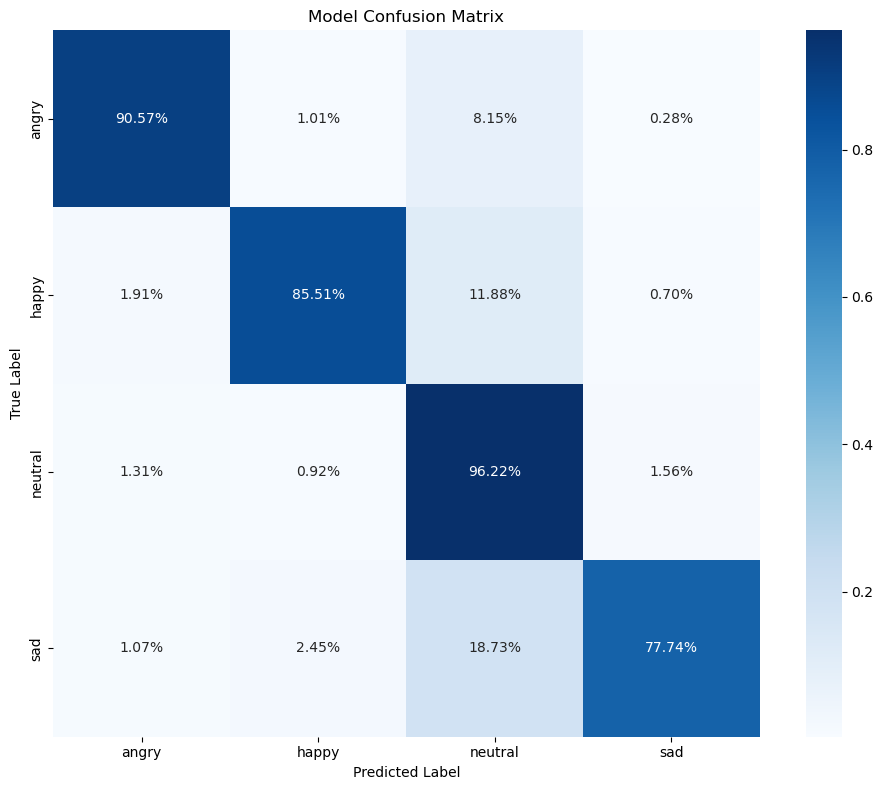


Classification Report:
------------------------------------------------------------
Class            Precision     Recall   F1-Score
------------------------------------------------------------
angry               96.35%     90.57%     93.37%
happy               93.92%     85.51%     89.52%
neutral             75.33%     96.22%     84.50%
sad                 96.35%     77.74%     86.05%
------------------------------------------------------------
Macro Average       90.49%     87.51%     88.36%
------------------------------------------------------------


In [ ]:
example_usage()